<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2927 non-null   int64  
 1   age              2927 non-null   int64  
 2   education        2927 non-null   float64
 3   sex              2927 non-null   object 
 4   is_smoking       2927 non-null   object 
 5   cigsPerDay       2927 non-null   float64
 6   BPMeds           2927 non-null   float64
 7   prevalentStroke  2927 non-null   int64  
 8   prevalentHyp     2927 non-null   int64  
 9   diabetes         2927 non-null   int64  
 10  totChol          2927 non-null   float64
 11  sysBP            2927 non-null   float64
 12  diaBP            2927 non-null   float64
 13  BMI              2927 non-null   float64
 14  heartRate        2927 non-null   float64
 15  glucose          2927 non-null   float64
 16  TenYearCHD       2927 non-null   float64
dtypes: float64(10), int

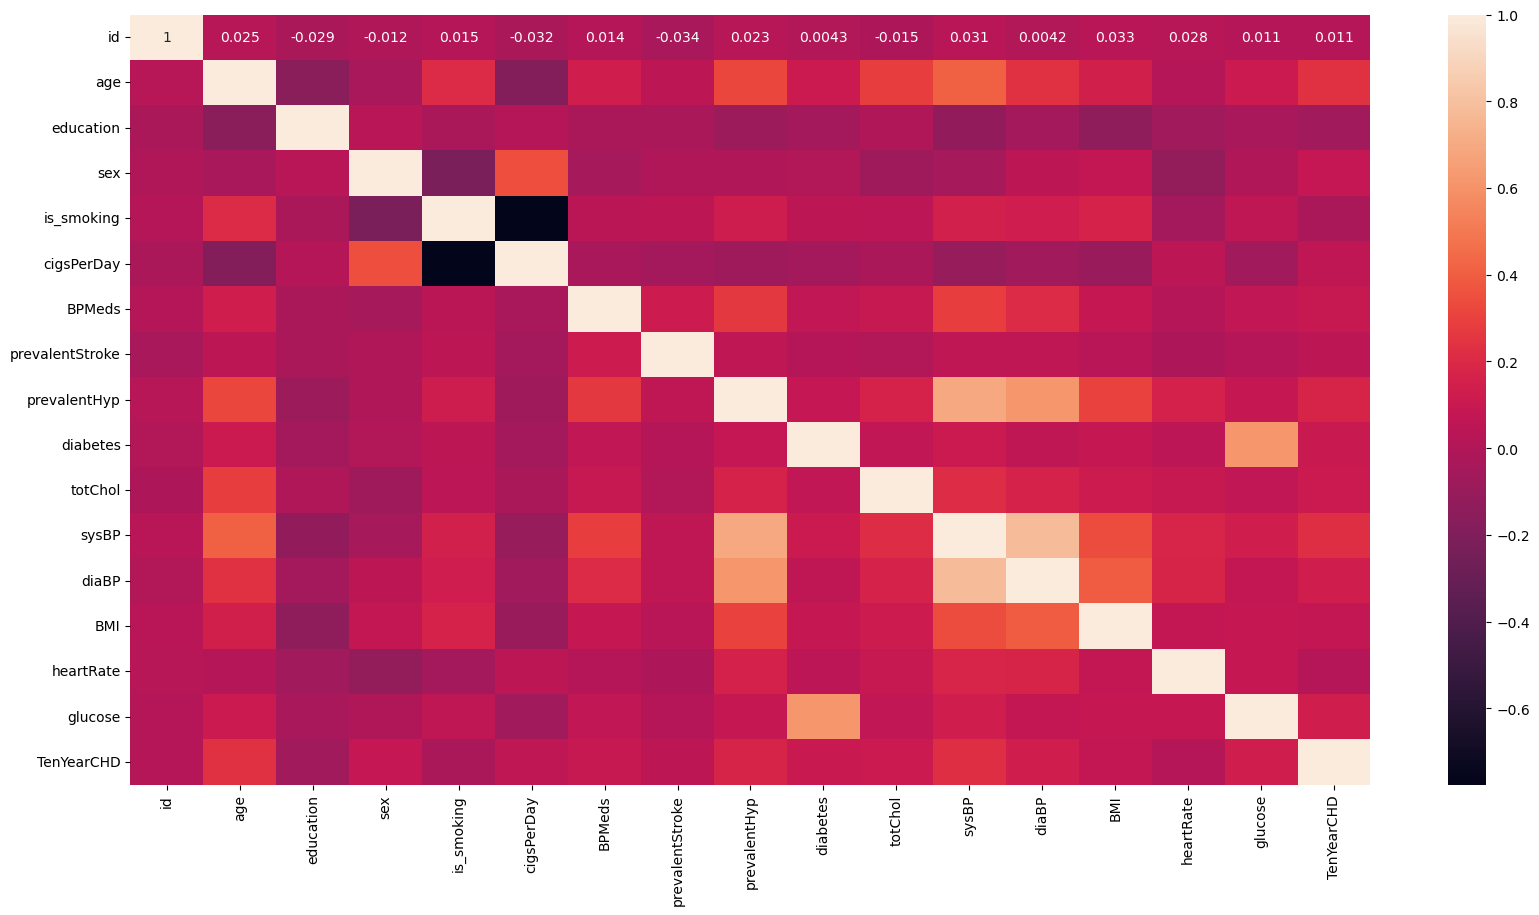

Accuracy: 0.8395904436860068


<Axes: xlabel='predicts', ylabel='Facts'>

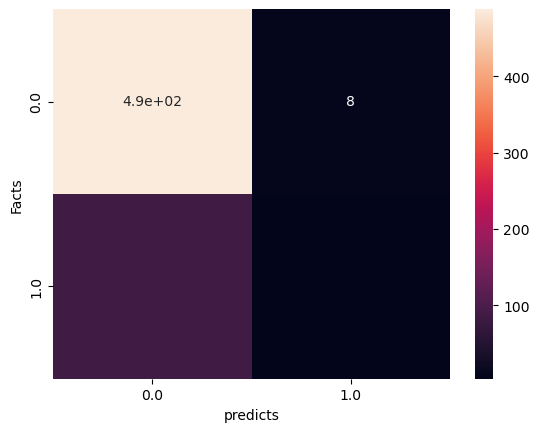

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
df=pd.read_csv("logistic_regression_dataset.csv")
df.isnull().sum().sum()
df=df.dropna(axis=0,how='any',inplace=False)
df.info()
df["sex"]=df["sex"].map({"F":0, "M":1})
df["is_smoking"]=df["is_smoking"].map({"NO":1, "YES":0})
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

X=df[['age','is_smoking','sex','prevalentHyp','prevalentStroke','sysBP','BMI','diaBP','diabetes']]
y=df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', format(model.score(x_test, y_test)))

from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix=pd.crosstab(
    y_test,
    y_pred,
    rownames=['Facts'],
    colnames= ['predicts'])
sns.heatmap(confusion_matrix, annot=True)




C:\Users\Dhoha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


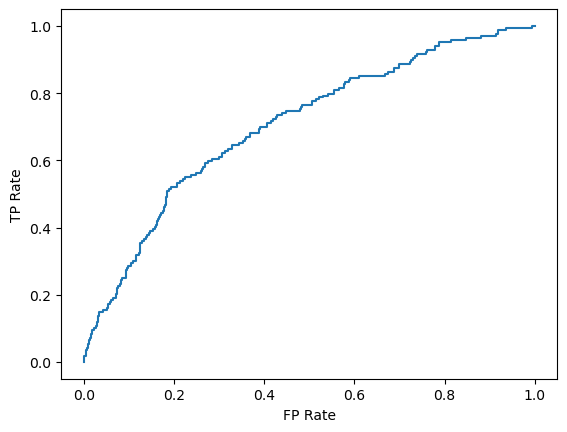

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
x=df[['age','is_smoking','sex','prevalentHyp','prevalentStroke','sysBP','BMI','diaBP','diabetes']]
y=df['TenYearCHD']

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4, random_state=1)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred_proba = log_reg.predict_proba(x_test)[::,1]
a,b, _ = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(a,b)
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()
